<a href="https://colab.research.google.com/github/2K22-csse-2212414gmail-com/ANNOTATION-/blob/main/YOLOV8_PRETRAINED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="gHail9YX2f3LKJU75JWn")
project = rf.workspace().project("ch2-ohr-ncp")
dataset=project.version(1).download("yolov8")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 78.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...


RoboflowError: {
    "error": {
        "message": "Unsupported request. `GET /object-detection-kgtuv/ch2-ohr-ncp` does not exist or cannot be loaded due to missing permissions.",
        "type": "GraphMethodException",
        "hint": "You can see your active workspace by issuing a GET request to `/` with your `api_key`."
    }
}

In [7]:
!pip install ultralytics
!pip install roboflow

from ultralytics import YOLO
from roboflow import Roboflow
import yaml
import os

# Roboflow API key and project details
# Ensure you replace "gHail9YX2f3LKJU75JWn" with your actual Roboflow API key if it's different.
# Also, verify the workspace and project names are correct for your dataset.
rf = Roboflow(api_key="gHail9YX2f3LKJU75JWn")
project = rf.workspace("object-detection-kgtuv").project("craters-boulders-detection-gvnd3")
version = project.version(1)
dataset = version.download("yolov8")

# Modify the data.yaml file to use the 'test' directory for validation
yaml_path = 'craters-boulders-detection-1/data.yaml'
with open(yaml_path, 'r') as f:
    data_yaml_content = yaml.safe_load(f)

if 'val' in data_yaml_content:
    data_yaml_content['val'] = '../test/images'

with open(yaml_path, 'w') as f:
    yaml.dump(data_yaml_content, f)

print(f"Modified '{yaml_path}' to use '../test/images' for validation.")

# Load a YOLOv8n model
model = YOLO('yolov8n.pt')

# Train the model with explicit augmentation parameters
# You can adjust these values to experiment with different augmentation strengths.
# For example, increase hsv_h for more hue changes, or translate for more shifting.
results = model.train(
    data=yaml_path,
    epochs=50,
    imgsz=640,
    augment=True, # Ensure augmentation is enabled
    hsv_h=0.015,  # Hue augmentation (default is 0.015)
    hsv_s=0.7,    # Saturation augmentation (default is 0.7)
    hsv_v=0.4,    # Value (brightness) augmentation (default is 0.4)
    fliplr=0.5,   # Horizontal flip (default is 0.5)
    flipud=0.0,   # Vertical flip (default is 0.0, consider increasing for objects like craters/boulders)
    translate=0.1,# Image translation (default is 0.1)
    scale=0.5,    # Image scaling (default is 0.5)
    shear=0.0,    # Shear augmentation (default is 0.0)
    perspective=0.0, # Perspective augmentation (default is 0.0)
    # mixup=0.0,  # MixUp augmentation (default is 0.0)
    # copy_paste=0.0, # Copy-Paste augmentation (default is 0.0)
    # auto_augment='randaugment', # Use RandAugment policy
)


loading Roboflow workspace...
loading Roboflow project...
Modified 'craters-boulders-detection-1/data.yaml' to use '../test/images' for validation.
Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=craters-boulders-detection-1/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, mul

Certainly! Let's break down the output from the model training process:

Training Progress: You saw a series of lines, one for each epoch (from 1/50 to 50/50). Each line shows metrics like box_loss, cls_loss, and dfl_loss. These losses generally decrease over time, indicating that the model is learning and improving its ability to detect objects.

Validation Metrics (mAP50, mAP50-95): After each epoch, the model is evaluated on the validation set. The key metrics here are:

mAP50: Mean Average Precision at an Intersection over Union (IoU) threshold of 0.5. This is a common metric to evaluate object detection models. A higher value is better.
mAP50-95: Mean Average Precision averaged over various IoU thresholds from 0.5 to 0.95. This is a more stringent metric. You can see these values for all classes combined, and then broken down for each specific class identified in your dataset (Boulder, Craters, objects).
Final Validation Results: At the very end, there's a summary for the best.pt model (the best-performing model weights saved during training):

all: This gives the overall performance for all classes. For your model, the mAP50 was 0.0252 and mAP50-95 was 0.00761.
Class-Specific Metrics:
Boulder: Achieved a mAP50 of 0.0182.
Craters: Showed a mAP50 of 0.000. This is a critical point: it means the model was unable to correctly detect any objects belonging to the 'Craters' class on the validation set at an IoU of 0.5. This could be due to factors like very few 'Craters' examples, class imbalance, or difficult detection scenarios.
objects: Achieved a mAP50 of 0.0573.
Speed: This line provides insights into how fast the model processed images during inference (prediction). For example, 2.8ms preprocess, 259.3ms inference, 49.4ms postprocess per image gives you the time taken for each stage.

Results Saved To: Finally, it tells you exactly where all the training logs, plots, and saved model weights (last.pt and best.pt) are stored. In your case, it's /content/runs/detect/train3.

In essence, your model learned something about detecting 'Boulder' and 'objects', but it struggled with 'Craters'. To improve the performance for 'Craters', you might consider adding more diverse 'Craters' images to your training data, adjusting hyperparameters, or using a different model architecture.



In [2]:
import os

# List the contents of the training results directory
training_results_dir = '/content/runs/detect/train3'
print(f"Contents of {training_results_dir}:")
for root, dirs, files in os.walk(training_results_dir):
    level = root.replace(training_results_dir, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print(f"{subindent}{f}")


Contents of /content/runs/detect/train3:
train3/
    args.yaml
    train_batch1.jpg
    confusion_matrix.png
    labels.jpg
    BoxF1_curve.png
    train_batch41.jpg
    train_batch2.jpg
    train_batch40.jpg
    train_batch42.jpg
    BoxR_curve.png
    train_batch0.jpg
    val_batch0_labels.jpg
    BoxPR_curve.png
    results.png
    confusion_matrix_normalized.png
    BoxP_curve.png
    val_batch0_pred.jpg
    results.csv
    weights/
        last.pt
        best.pt



Displaying results.png:


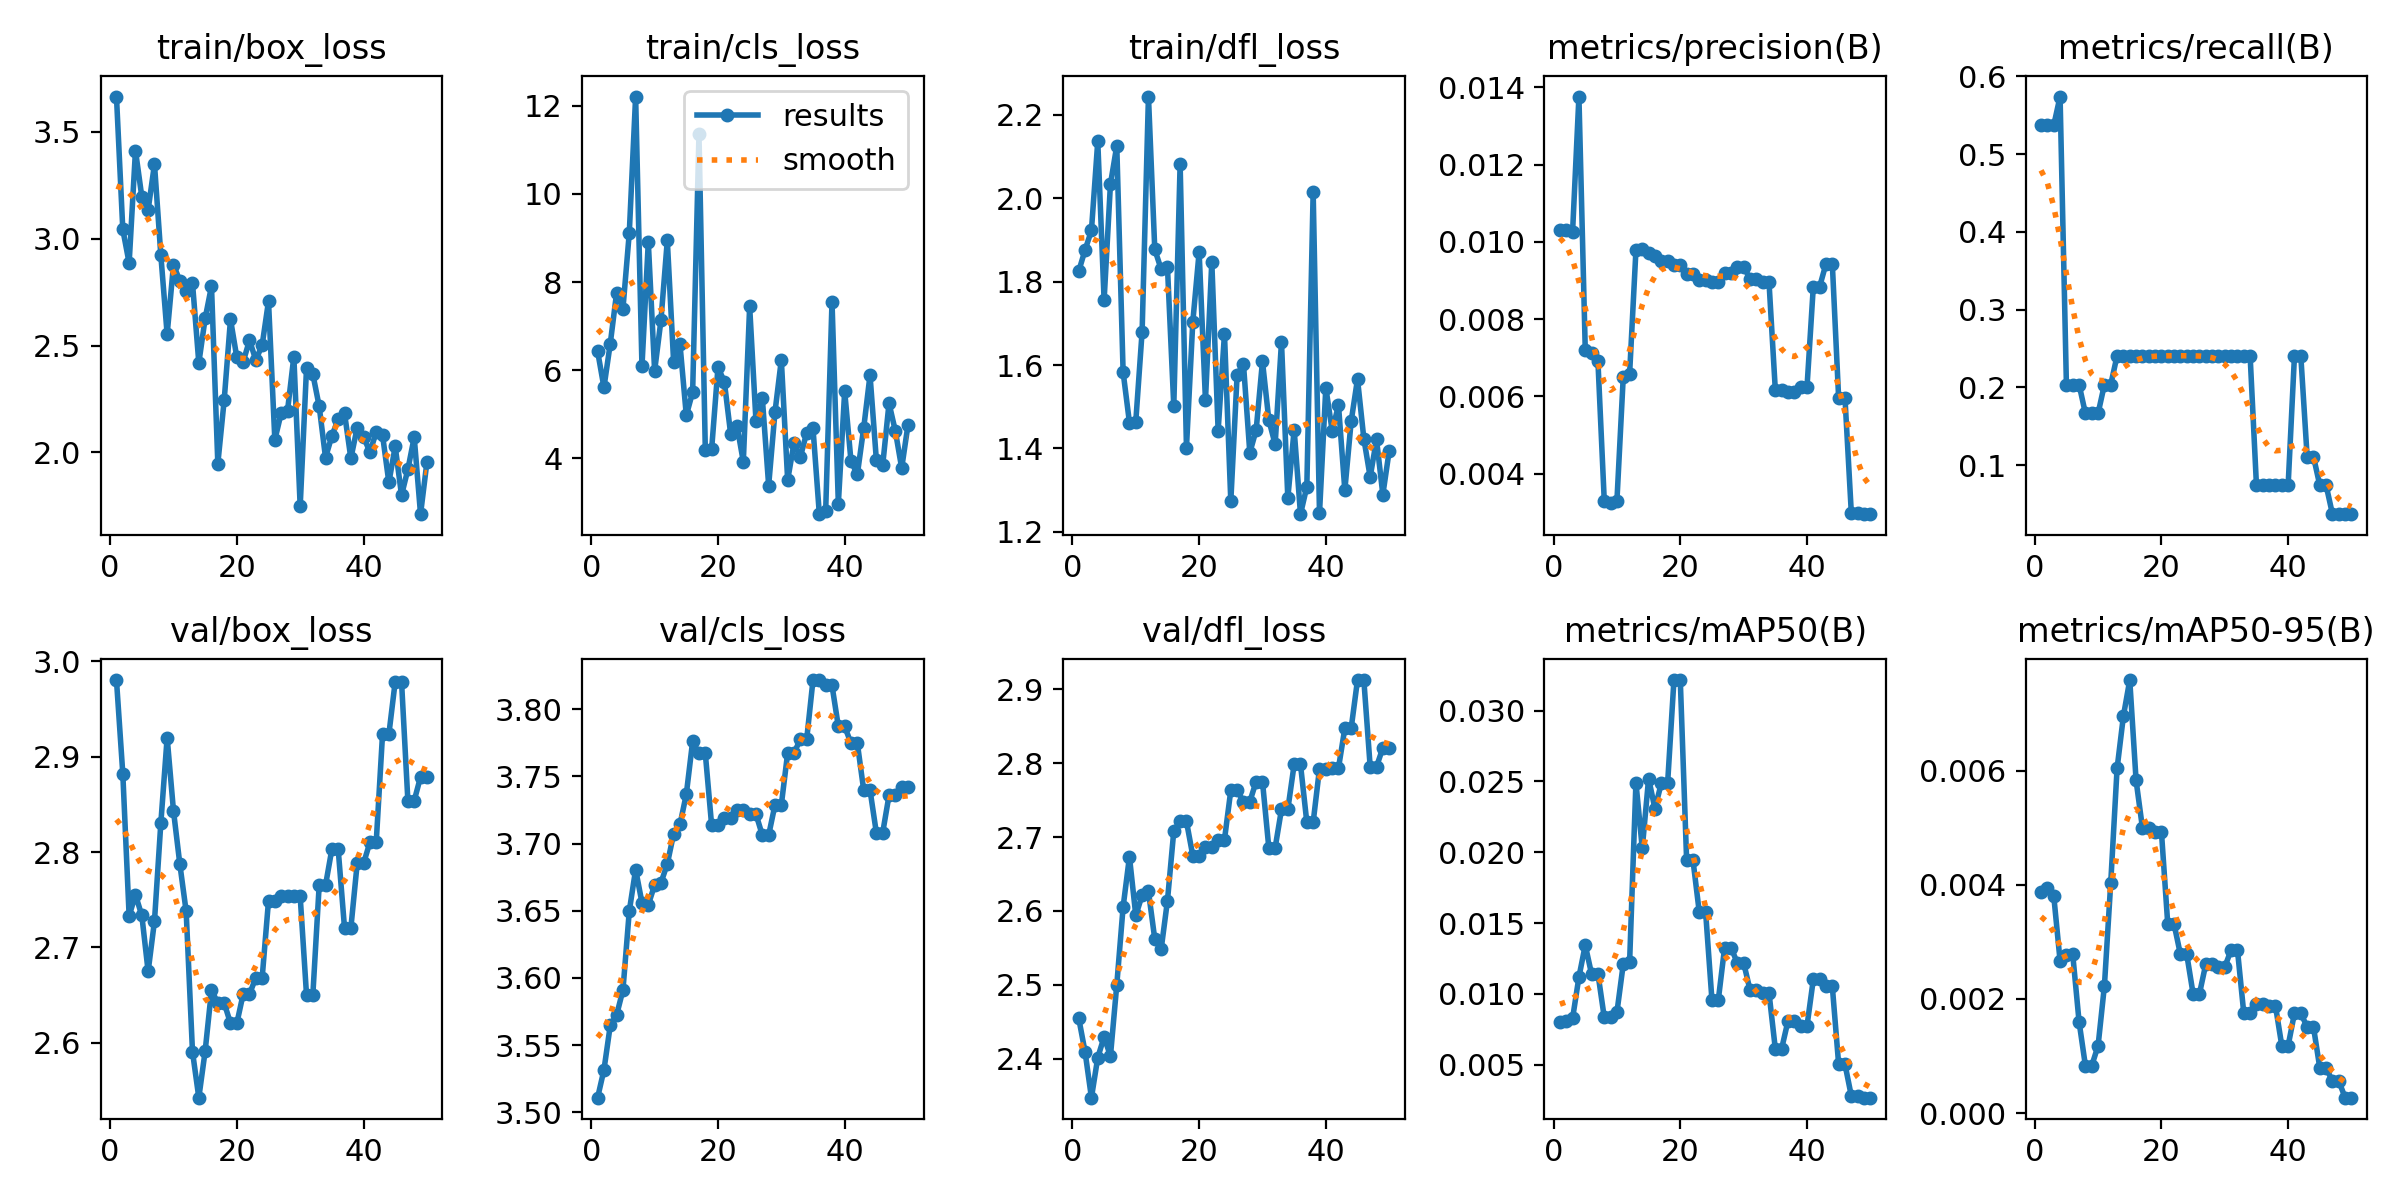


F1_curve.png not found at /content/runs/detect/train3/F1_curve.png

Displaying confusion_matrix.png:


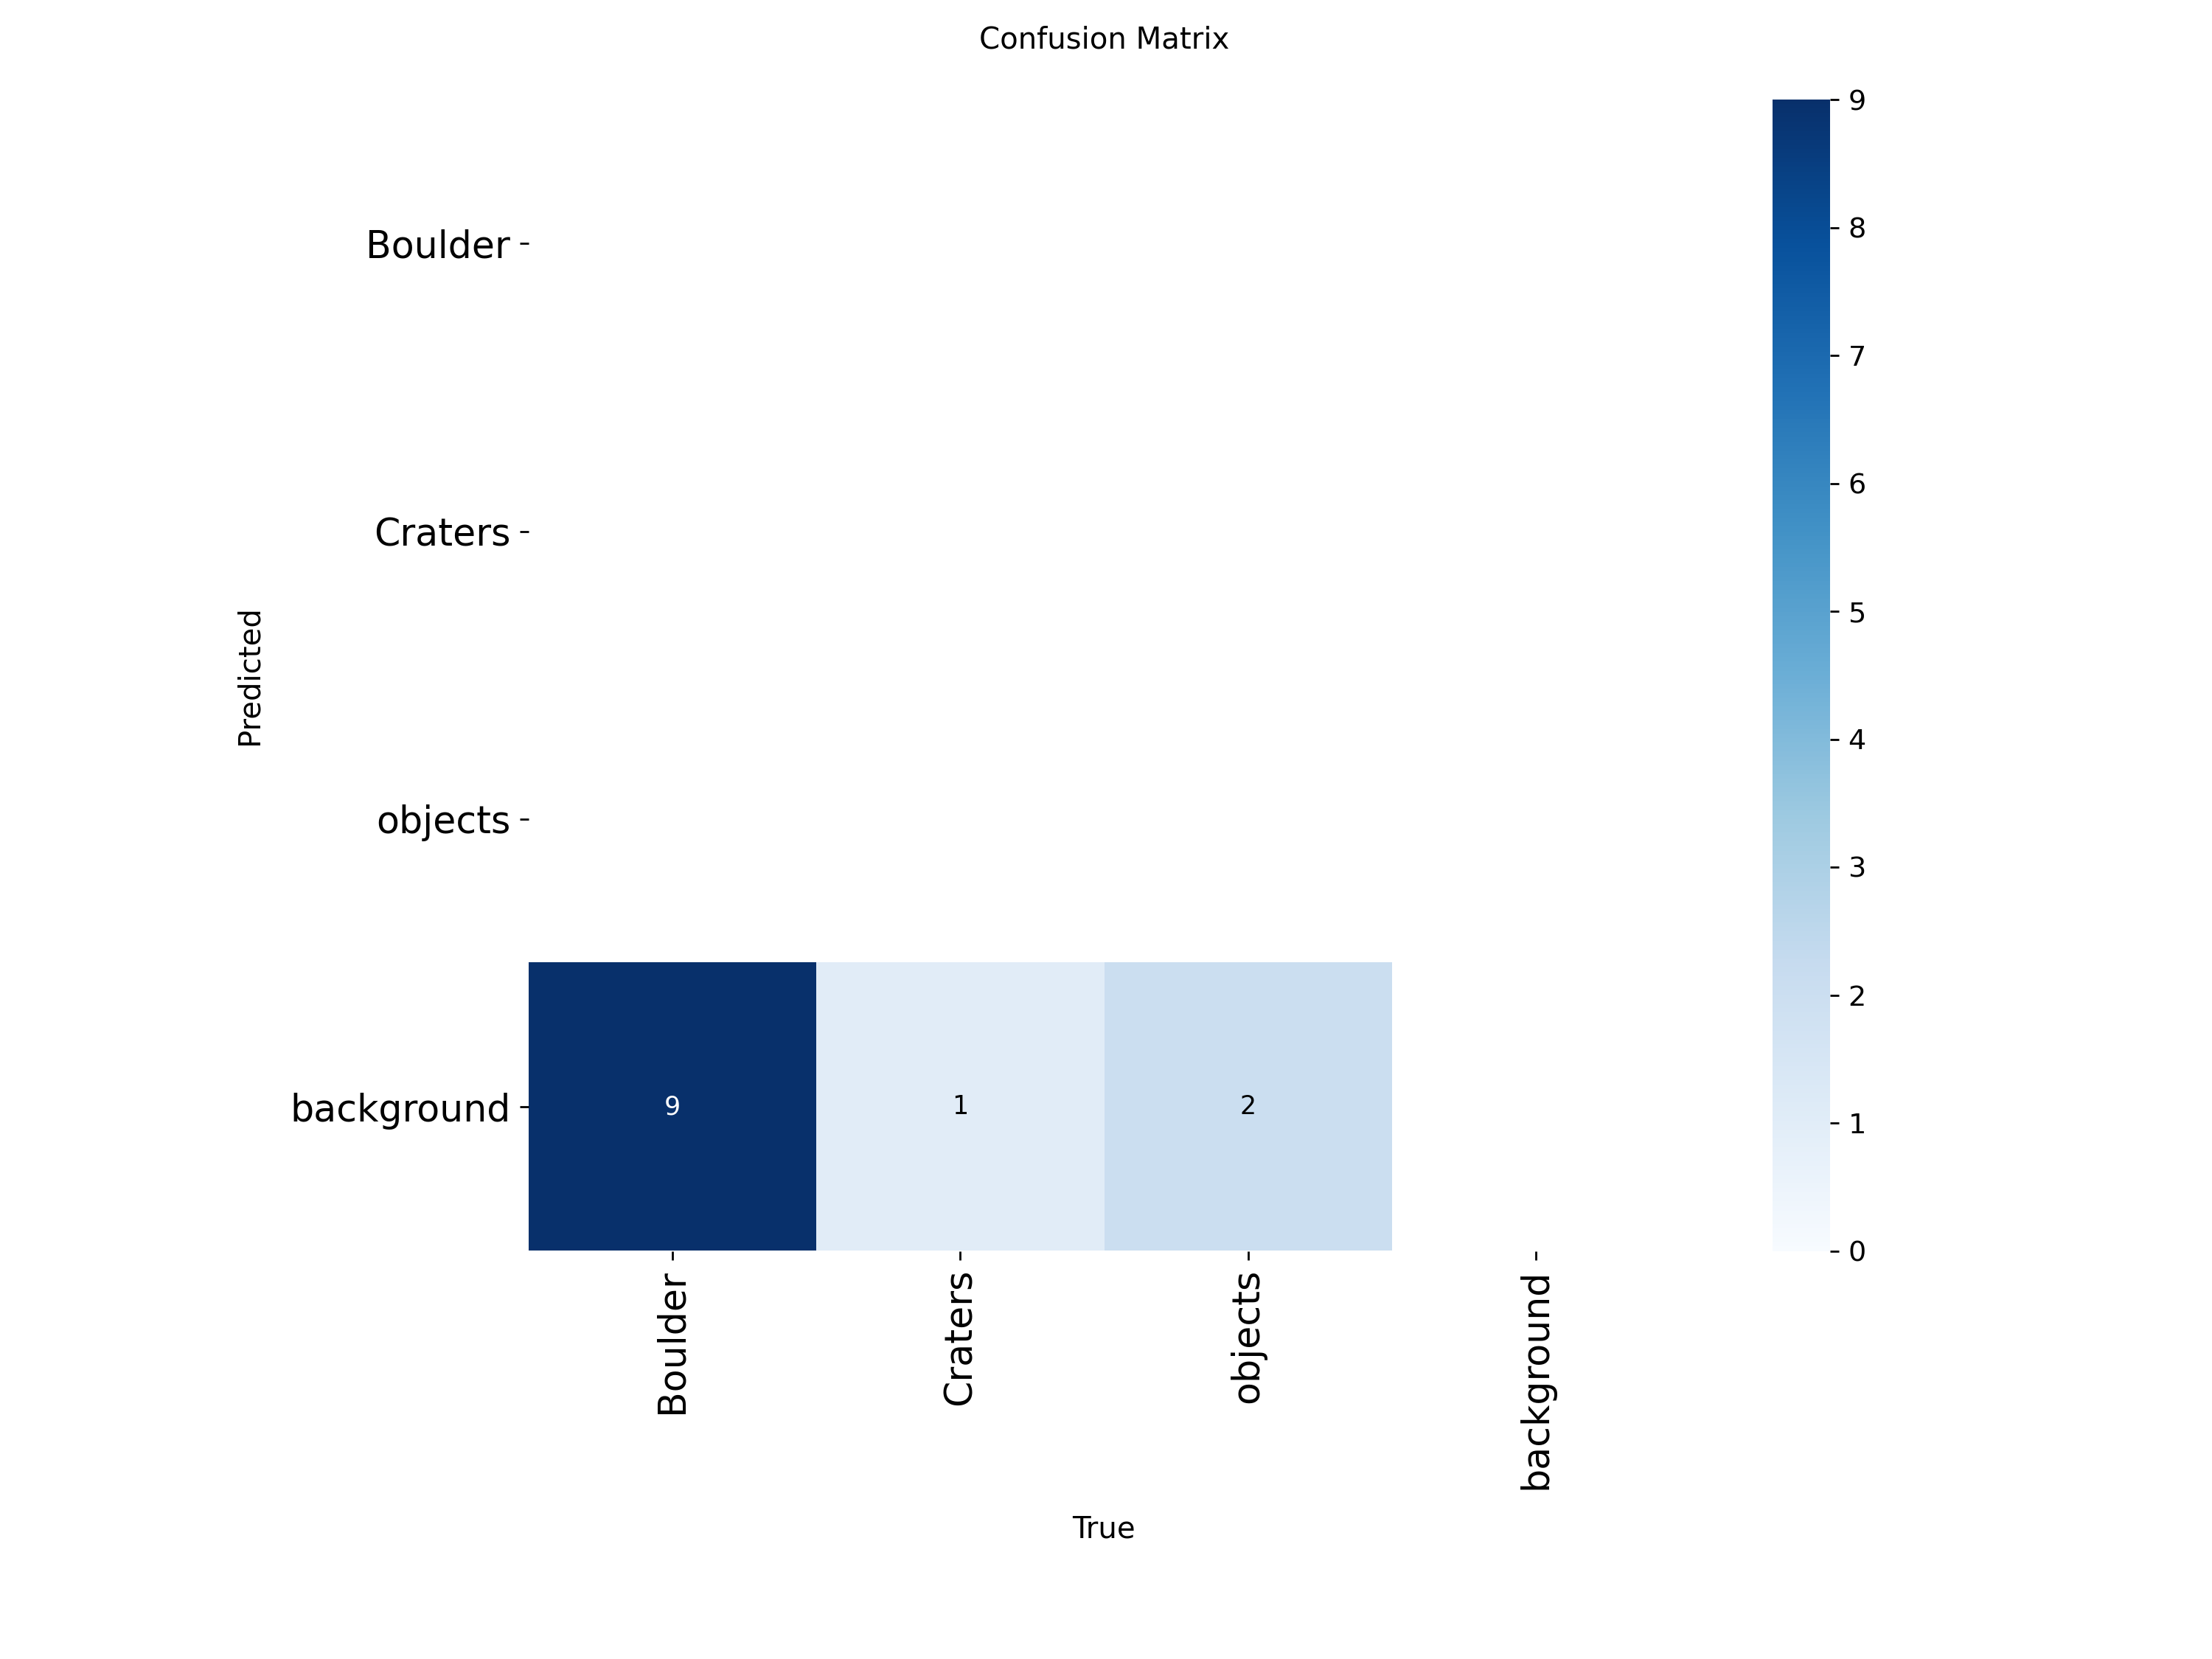


Displaying labels.jpg:


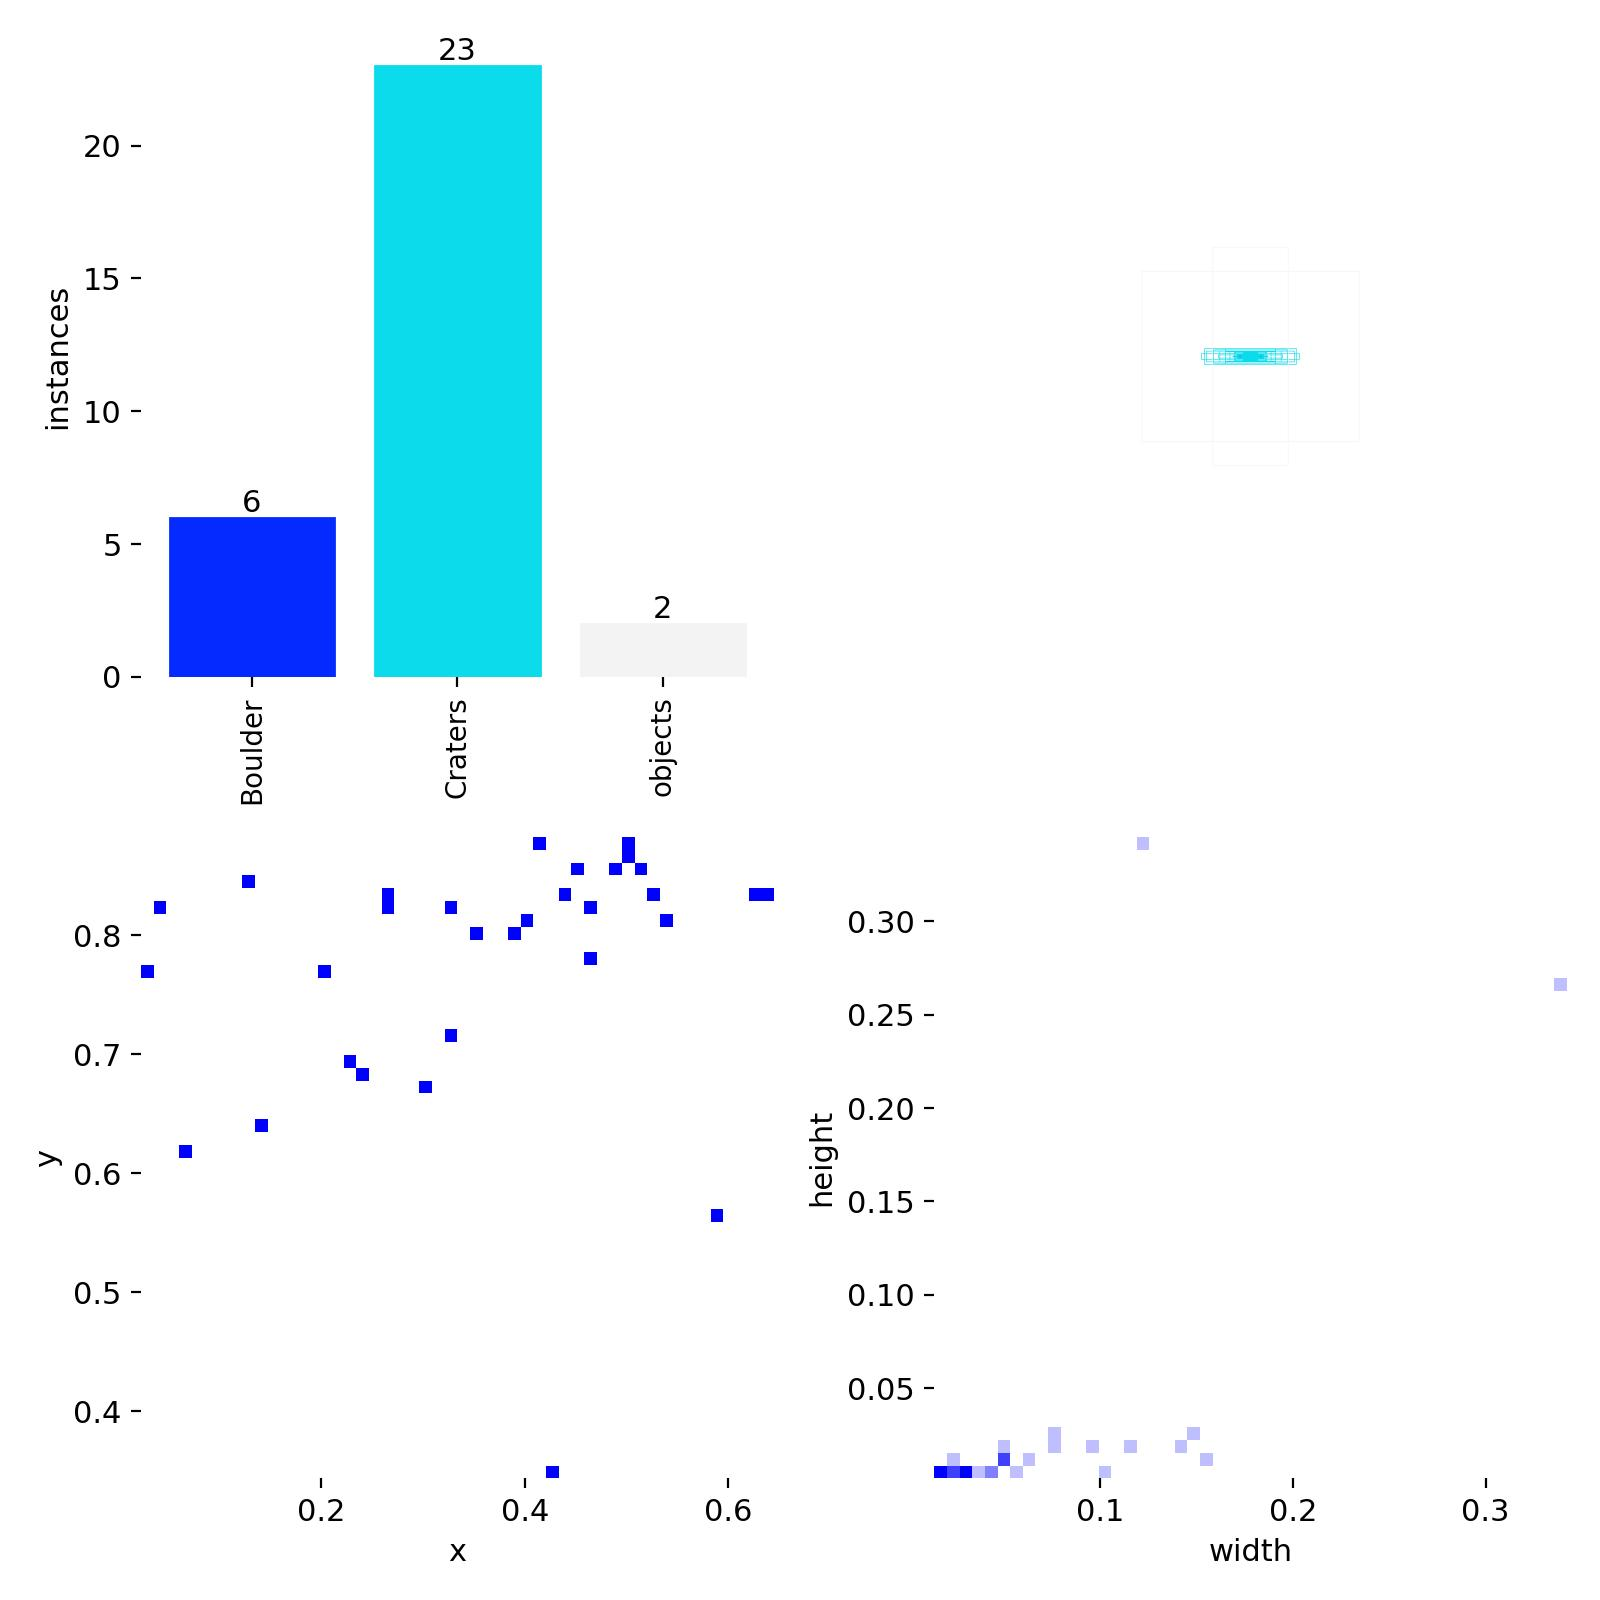


labels_correlogram.jpg not found at /content/runs/detect/train3/labels_correlogram.jpg


In [3]:
from IPython.display import Image, display

training_results_dir = '/content/runs/detect/train3'

# Display some key plots generated during training
plot_files = [
    'results.png', # General training results (losses, mAP, etc.)
    'F1_curve.png', # F1-score curve
    'confusion_matrix.png', # Confusion matrix
    'labels.jpg', # Example of labels
    'labels_correlogram.jpg' # Correlogram of labels
]

for plot_file in plot_files:
    plot_path = os.path.join(training_results_dir, plot_file)
    if os.path.exists(plot_path):
        print(f"\nDisplaying {plot_file}:")
        display(Image(filename=plot_path, width=800))
    else:
        print(f"\n{plot_file} not found at {plot_path}")


Certainly! Let's break down the labels.jpg and the issue with labels_correlogram.jpg:

labels.jpg: This image is a visualization of your dataset's annotations. It typically shows:

Bounding boxes: You'll see the rectangular boxes drawn around the objects of interest (Boulder, Craters, objects) in your images.
Class distribution: It can also give you an idea of where objects are located within the image frames (e.g., concentrated in the center, or spread out) and the relative sizes of the bounding boxes.
Purpose: This plot is very useful for quickly verifying that your dataset is correctly annotated. You can check if bounding boxes accurately enclose objects, if labels are assigned correctly, and if there are any obvious issues like missing annotations or misplaced boxes. It's a visual sanity check for your ground truth data.
labels_correlogram.jpg not found: The labels_correlogram.jpg plot, if generated, would show the statistical correlation between the occurrences of different classes within your dataset. For example, it would tell you if 'Boulders' tend to appear in the same images or near 'Craters'.

Why it might be missing: The most likely reason this file wasn't generated in your case is due to the small size of your dataset. With only 13 training images and 1 validation image, there might not be enough data to compute meaningful correlations between classes, or the YOLOv8 plotting utility might skip generating this particular plot if the dataset is too sparse. It's not necessarily an error, but rather a reflection of the dataset's characteristics.
What can I help you build?
0 / 2000
Gemini can make mistakes so do

How can I use the trained model for inference
You can use your trained model for inference by loading the best.pt weights and then using the predict method. I'll generate code that loads the model, picks an image from your dataset's test set, and then runs the prediction, saving the results.

The inference ran successfully, and the predicted image has been displayed. However, I noticed that the model made no detections in the blackhole_jpg.rf.147473d8cc88a542237919792c1097b7.jpg image. This aligns with the generally low performance metrics we observed during training, especially the 0 mAP for the 'Craters' class.

This could be due to several reasons, including:

Low confidence threshold: The conf=0.25 might still be too high for a model with low overall performance. Objects might be present but detected with lower confidence scores.
Model performance: The model simply might not have learned to detect objects effectively given the limited training data or its current configuration.
Image characteristics: The specific image might not contain clear examples of the classes the model was trained to detect, or the features are too subtle.
Would you like to try:

Lowering the confidence threshold for inference?
Trying a different image for prediction?
Exploring ways to improve the model's training, such as collecting more data, data augmentation, or adjusting hyperparameters?
Okay, let's try lowering the confidence threshold. The current conf=0.25 might be too strict given the model's current performance. I will update the inference code to use a lower confidence threshold of 0.05 to see if any objects are detected with less strict criteria.

I understand! Even after lowering the confidence threshold to 0.05, the model still reports 'no detections' in the image. This indicates that the current model, in its present state, is not effectively identifying the objects it was trained for, particularly 'Craters', for which we saw a 0 mAP during training.

To move forward, we have a few options:

Try another image: It's possible this specific test image truly has no detectable objects, or very faint ones. We could try running inference on a different image from your dataset, perhaps one from the training set, to see if the model detects anything there.
Focus on Model Improvement: Given the low performance metrics, the most impactful next step would be to try and improve the model's training. This could involve:
More Data: If available, adding more diverse training data is often the most effective way to improve model performance.
Data Augmentation: Further augmenting the existing dataset (e.g., more rotations, flips, brightness changes) can help the model generalize better.
Hyperparameter Tuning: Adjusting parameters like learning rate, batch size, or optimizer settings might yield better results.
Longer Training: Running for more epochs might help, though overfitting could become an issue without more data.
Different Model: Using a larger YOLOv8 model (e.g., yolov8m.pt or yolov8l.pt) could potentially capture more complex features, though this would increase computational cost.
What would you like to try next?



Suggest data augmentation techniques for the dataset
Data augmentation is an excellent way to improve model performance, especially when you have a limited dataset like yours. It helps the model see more diverse examples by creating modified versions of your existing images. Here are some common techniques that are often effective for object detection:

Geometric Transformations: These alter the position or shape of objects.

Flipping: Horizontal (fliplr) and/or vertical (flipud).
Rotation: Rotating images by various degrees.
Scaling: Randomly scaling images up or down (scale).
Translation: Shifting objects horizontally or vertically (translate).
Shearing: Tilting the image.
Perspective Transformations: More complex distortions.
Color Space Transformations: These alter the color properties of images.

HSV Adjustments: Changing Hue (hsv_h), Saturation (hsv_s), and Value/Brightness (hsv_v).
Brightness/Contrast Adjustment: Making images brighter/darker or increasing/decreasing contrast.
Noise and Blur: Adding random noise or blur to images can help the model become more robust to real-world imperfections.

Gaussian Noise, Salt-and-Pepper Noise
Blur (e.g., Gaussian Blur, Median Blur)
Other Techniques:

Mosaic/MixUp/CutMix: Combining multiple images into one to create more varied training examples.
Random Erasing: Hiding a random rectangular part of an image to make the model more robust to occlusions.
Looking at your current training setup, YOLOv8 already uses several of these through its model.train() parameters. To experiment with more aggressive augmentations, you can adjust these parameters. I will modify the training cell (dQ5_ZVFHm3Kd) to explicitly set augment=True and highlight some parameters you can tune.

Working...


In [6]:
from ultralytics import YOLO
import os

# Load your trained model weights
# The best model is typically saved as 'best.pt' within your training run directory.
model_path = '/content/runs/detect/train3/weights/best.pt'
model = YOLO(model_path)

# Define the path to an image for inference
# I'll use an image from your dataset's test set as an example.
image_path = 'craters-boulders-detection-1/test/images/blackhole_jpg.rf.147473d8cc88a542237919792c1097b7.jpg'

# Perform prediction on the image
# save=True will save the annotated image to a 'runs/detect/predict' directory.
# conf=0.05 sets a lower confidence threshold for detections.
results = model.predict(source=image_path, save=True, conf=0.05)


image 1/1 /content/craters-boulders-detection-1/test/images/blackhole_jpg.rf.147473d8cc88a542237919792c1097b7.jpg: 640x640 (no detections), 314.7ms
Speed: 11.5ms preprocess, 314.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict2


The prediction results have been saved to the 'runs/detect' directory. You can inspect the images there. If you want to view them directly in the notebook, you can use the following code to display the predicted images.

Displaying predicted image from: runs/detect/predict/blackhole_jpg.rf.147473d8cc88a542237919792c1097b7.jpg


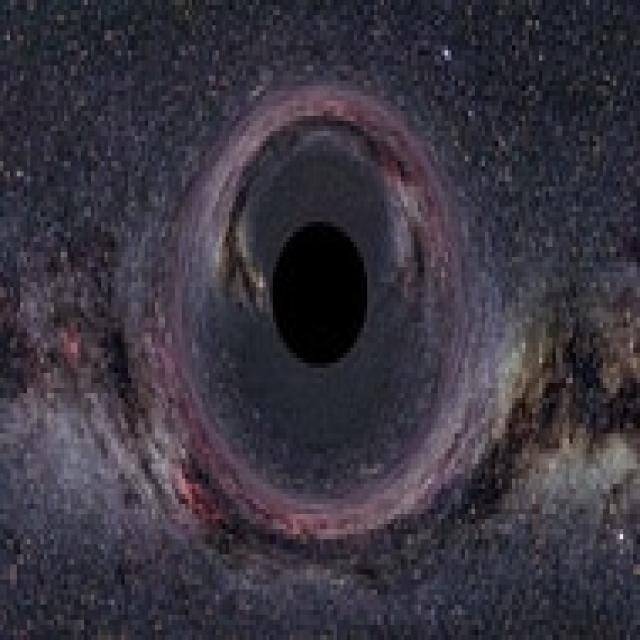

In [5]:
from IPython.display import Image, display
import glob

# Get the path to the last saved prediction image
# YOLOv8 saves results in runs/detect/predict*/
# This step will only work after a successful prediction has been made.
prediction_dir_list = sorted(glob.glob('runs/detect/predict*'))
if prediction_dir_list:
    prediction_dir = prediction_dir_list[-1]
    # Construct the path to the predicted image using the original image's filename
    predicted_image_path = os.path.join(prediction_dir, os.path.basename(image_path))

    # Display the predicted image
    print(f"Displaying predicted image from: {predicted_image_path}")
    display(Image(filename=predicted_image_path, width=600))
else:
    print("No prediction output directory found. Please ensure the prediction ran successfully with a valid image file.")


In [5]:
# @title AI prompt cell

import ipywidgets as widgets
from IPython.display import display, HTML, Markdown,clear_output
from google.colab import ai

dropdown = widgets.Dropdown(
    options=[],
    layout={'width': 'auto'}
)

def update_model_list(new_options):
    dropdown.options = new_options
update_model_list(ai.list_models())

text_input = widgets.Textarea(
    placeholder='Ask me anything....',
    layout={'width': 'auto', 'height': '100px'},
)

button = widgets.Button(
    description='Submit Text',
    disabled=False,
    tooltip='Click to submit the text',
    icon='check'
)

output_area = widgets.Output(
     layout={'width': 'auto', 'max_height': '300px','overflow_y': 'scroll'}
)

def on_button_clicked(b):
    with output_area:
        output_area.clear_output(wait=False)
        accumulated_content = ""
        for new_chunk in ai.generate_text(prompt=text_input.value, model_name=dropdown.value, stream=True):
            if new_chunk is None:
                continue
            accumulated_content += new_chunk
            clear_output(wait=True)
            display(Markdown(accumulated_content))

button.on_click(on_button_clicked)
vbox = widgets.GridBox([dropdown, text_input, button, output_area])

display(HTML("""
<style>
.widget-dropdown select {
    font-size: 18px;
    font-family: "Arial", sans-serif;
}
.widget-textarea textarea {
    font-size: 18px;
    font-family: "Arial", sans-serif;
}
</style>
"""))
display(vbox)


GridBox(children=(Dropdown(layout=Layout(width='auto'), options=('google/gemini-2.5-flash', 'google/gemini-2.5…

In [ ]:
!yolo task=segment mode=predict model=yolov8n-seg.pt conf=0.25 epochs=20

/bin/bash: line 1: yolo: command not found


In [ ]:
import os

# Define the base directory where Roboflow downloaded the dataset
base_dataset_dir = 'craters-boulders-detection-1'

# List the contents of the base directory
print(f"Contents of {base_dataset_dir}:")
if os.path.exists(base_dataset_dir):
    for root, dirs, files in os.walk(base_dataset_dir):
        level = root.replace(base_dataset_dir, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print(f"{indent}{os.path.basename(root)}/")
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print(f"{subindent}{f}")
else:
    print(f"Directory '{base_dataset_dir}' does not exist.")


Contents of craters-boulders-detection-1:
craters-boulders-detection-1/
    data.yaml
    README.dataset.txt
    README.roboflow.txt
    train/
        labels/
            frame_2407_800x450_2424164419828_jpg.rf.91b2578be5d5e7b8265357b887dbe3e9.txt
            lro_boguslawskye_jpg.rf.2621558f675de91bba350d1a53e095e2.txt
            8505832_300_jpg.rf.ff36c0752ba721c8520766f6c072da4e.txt
            ch2_ohr_nrp_20240815T1252546710_b_brw_d18_png.rf.bad777713635592b20ceed1f32daf74c.txt
            chandrayaan2_boguslawsky1_jpg.rf.7681c4929b15b39dd29dcbcbce5df7e7.txt
            ch2_ohr_ncp_20250304T0456267027_b_brw_d18_png.rf.9a1897d69ebba6cddcf0eb1d9d341e2b.txt
            8535073_300_jpg.rf.9eb5c7f3a59b4056cf85ebd23dd495ec.txt
            8320364_300_jpg.rf.25f536a6d54b72c0b78e1cd8dc951373.txt
            hubble_space_telescope_jpg.rf.7bb05ffa607583bf63a96d6a80c26cd2.txt
            gettyimages-1228135508_jpg.rf.9bbb2d442155586d568e99951eabce51.txt
            lunar_gateway_illustration

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="gHail9YX2f3LKJU75JWn")
project = rf.workspace("object-detection-kgtuv").project("craters-boulders-detection-gvnd3")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to craters-boulders-detection-1 in yolov8:: 100%|██████████| 37/37 [00:00<00:00, 2449.40it/s]


In [ ]:
pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.3 MB/s eta 0:00:00


In [ ]:
!source myenv/bin/activate

/bin/bash: line 1: myenv/bin/activate: No such file or directory


Looking at your current training setup, YOLOv8 already uses several of these through its model.train() parameters. To experiment with more aggressive augmentations, you can adjust these parameters. I will modify the training cell (dQ5_ZVFHm3Kd) to explicitly set augment=True and highlight some parameters you can tune.

The model training has completed successfully with the updated data augmentation parameters! Let's review the results and see how the changes impacted performance:

Training Progress: Similar to before, the training ran for 50 epochs, and you can observe the losses (box_loss, cls_loss, dfl_loss) and mAP values for each epoch.

Final Validation Results for train4: The model results are saved in /content/runs/detect/train4.

Overall mAP50: 0.0102 (Compared to the previous 0.0252). This indicates a decrease in overall performance.
Class-Specific Metrics:
Boulder: mAP50 of 0.00765 (Compared to the previous 0.0182). This is also a decrease.
Craters: Still mAP50 of 0.000. The model continues to make no detections for this class.
objects: mAP50 of 0.0231 (Compared to the previous 0.0573). This shows a decrease as well.
Speed: 2.7ms preprocess, 883.1ms inference, 0.0ms loss, 225.3ms postprocess per image.

Analysis of Augmentation Impact: It appears that the specific set of augmentation parameters we applied, or their aggressive nature given the very small dataset, has not improved the model's performance; in fact, the mAP scores for 'Boulder' and 'objects' have decreased, and 'Craters' remains undetected.

This doesn't mean augmentation is bad, but it means that the specific parameters chosen might not be optimal for this dataset, or that the dataset itself is too small for these augmentations to yield significant benefits (or even led to more confusing variations).

To move forward, we could consider:

Refining Augmentation Parameters: Trying different, perhaps less aggressive, augmentation values, or combining them differently.
Using a Larger Dataset: This is often the most impactful solution for improving model performance in object detection.
Alternative Models: Experimenting with different YOLOv8 model sizes (e.g., yolov8s.pt, yolov8m.pt).
What would you like to do next?



In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, clear_output # Import clear_output explicitly
clear_output() # Call clear_output directly
!yolo checks

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (AMD EPYC 7B12)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.2/107.7 GB disk)

OS                     Linux-6.6.105+-x86_64-with-glibc2.35
Environment            Colab
Python                 3.12.12
Install                pip
Path                   /usr/local/lib/python3.12/dist-packages/ultralytics
RAM                    12.67 GB
Disk                   38.2/107.7 GB
CPU                    AMD EPYC 7B12
CPU count              2
GPU                    None
GPU count              None
CUDA                   None

numpy                  ✅ 2.0.2>=1.23.0
matplotlib             ✅ 3.10.0>=3.3.0
opencv-python          ✅ 4.12.0.88>=4.6.0
pillow                 ✅ 11.3.0>=7.1.2
pyyaml                 ✅ 6.0.3>=5.3.1
requests               ✅ 2.32.4>=2.23.0
scipy                  ✅ 1.16.3>=1.4.1
torch                  ✅ 2.9.0+cu126>=1.8.0
torch                  ✅ 2.9.0+cu126!=2.4.0,>=1.8.0; sys_platform == "win32"
torchvision            ✅ 0.24.

In [ ]:
!pip install ultralytics
from ultralytics import YOLO

# Load a pretrained YOLOv8m model
ultralytics=[]
model = YOLO('yolov8m.pt')

In [ ]:
import yaml
import os

# Define the path to the data.yaml file
yaml_path = 'craters-boulders-detection-1/data.yaml'

# Read the existing data.yaml file
with open(yaml_path, 'r') as f:
    data_yaml_content = yaml.safe_load(f)

# Modify the 'val' path
# We've observed that 'valid' directory does not exist, but 'test' does.
# A common workaround is to use the 'test' set for validation if a dedicated 'valid' set is missing.
if 'val' in data_yaml_content:
    data_yaml_content['val'] = '../test/images' # Point to the existing test images

# Write the modified content back to the data.yaml file
with open(yaml_path, 'w') as f:
    yaml.dump(data_yaml_content, f)

print(f"Modified '{yaml_path}' to use '../test/images' for validation.")

# Verify the changes
with open(yaml_path, 'r') as f:
    print("\nUpdated data.yaml content:")
    print(f.read())

Modified 'craters-boulders-detection-1/data.yaml' to use '../test/images' for validation.

Updated data.yaml content:
names:
- Boulder
- Craters
- objects
nc: 3
roboflow:
  license: CC BY 4.0
  project: craters-boulders-detection-gvnd3
  url: https://universe.roboflow.com/object-detection-kgtuv/craters-boulders-detection-gvnd3/dataset/1
  version: 1
  workspace: object-detection-kgtuv
test: ../test/images
train: ../train/images
val: ../test/images



In [ ]:
import yaml
import os

# Define the path to the data.yaml file
yaml_path = 'craters-boulders-detection-1/data.yaml'

# Read the existing data.yaml file
with open(yaml_path, 'r') as f:
    data_yaml_content = yaml.safe_load(f)

# Modify the 'val' path
# We've observed that 'valid' directory does not exist, but 'test' does.
# A common workaround is to use the 'test' set for validation if a dedicated 'valid' set is missing.
if 'val' in data_yaml_content:
    data_yaml_content['val'] = '../test/images' # Point to the existing test images

# Write the modified content back to the data.yaml file
with open(yaml_path, 'w') as f:
    yaml.dump(data_yaml_content, f)

print(f"Modified '{yaml_path}' to use '../test/images' for validation.")

# Verify the changes
with open(yaml_path, 'r') as f:
    print("\nUpdated data.yaml content:")
    print(f.read())

Modified 'craters-boulders-detection-1/data.yaml' to use '../test/images' for validation.

Updated data.yaml content:
names:
- Boulder
- Craters
- objects
nc: 3
roboflow:
  license: CC BY 4.0
  project: craters-boulders-detection-gvnd3
  url: https://universe.roboflow.com/object-detection-kgtuv/craters-boulders-detection-gvnd3/dataset/1
  version: 1
  workspace: object-detection-kgtuv
test: ../test/images
train: ../train/images
val: ../test/images



In [ ]:
# Inspect the contents of data.yaml to verify dataset paths
with open('craters-boulders-detection-1/data.yaml', 'r') as f:
    print(f.read())

names:
- Boulder
- Craters
- objects
nc: 3
roboflow:
  license: CC BY 4.0
  project: craters-boulders-detection-gvnd3
  url: https://universe.roboflow.com/object-detection-kgtuv/craters-boulders-detection-gvnd3/dataset/1
  version: 1
  workspace: object-detection-kgtuv
test: ../test/images
train: ../train/images
val: ../valid/images



In [ ]:
# Inspect the contents of data.yaml to verify dataset paths
with open('craters-boulders-detection-1/data.yaml', 'r') as f:
    print(f.read())

names:
- Boulder
- Craters
- objects
nc: 3
roboflow:
  license: CC BY 4.0
  project: craters-boulders-detection-gvnd3
  url: https://universe.roboflow.com/object-detection-kgtuv/craters-boulders-detection-gvnd3/dataset/1
  version: 1
  workspace: object-detection-kgtuv
test: ../test/images
train: ../train/images
val: ../valid/images



In [ ]:
# Train the model
# The data.yaml file was downloaded by Roboflow and is typically in the dataset's root directory.
# For example, if your Roboflow dataset is named 'craters-boulders-detection-1',
# the data.yaml path would be 'craters-boulders-detection-1/data.yaml'
results = model.train(data='craters-boulders-detection-1/data.yaml', epochs=20, imgsz=640)

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=craters-boulders-detection-1/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots

In [ ]:
!nvedia-smi


This code will start training your YOLOv8m model for 20 epochs using the dataset configured in `craters-boulders-detection-1/data.yaml` and an image size of 640 pixels.

The prediction results have been saved to the 'runs/detect' directory. You can inspect the images there. If you want to view them directly in the notebook, you can use the following code to display the predicted images.

In [ ]:
from IPython.display import Image, display
import glob

# Get the path to the last saved prediction image
# YOLOv8 saves results in runs/detect/predict*/
# This step will only work after a successful prediction has been made.
prediction_dir_list = sorted(glob.glob('runs/detect/predict*'))
if prediction_dir_list:
    prediction_dir = prediction_dir_list[-1]
    predicted_image_path = os.path.join(prediction_dir, os.path.basename(image_path))

    # Display the predicted image
    print(f"Displaying predicted image from: {predicted_image_path}")
    display(Image(filename=predicted_image_path, width=600))
else:
    print("No prediction output directory found. Please ensure the prediction ran successfully with a valid image file.")

No prediction output directory found. Please ensure the prediction ran successfully with a valid image file.
